# Data Importing & Pre-Processing

## Importing all the files

Files:
 * ```capture_test-05```, recording of a Meet call with audio and sound enabled.
 * ```capture_test-06```, recording of a silent environment without any call. Siri is activated via vocal command.
 * ```capture_test-07```, recording of a Meet call with just audio enabled. A ringtone is played.
 * ```capture_test-08```, recording of a silent environment without any call.
 * ```capture_test-09```, recording of a Meet call with just audio enabled. The call has just background noise.

### To-do list

#### ```capture_test-05```
 - [X] Filter uplink data traffic from Luna's phone.
 - [X] .
#### ```capture_test-06```
 - [X] Filter uplink data traffic from Luna's phone.
 - [X] .
#### ```capture_test-07```
 - [X] Filter uplink data traffic from Luna's phone.
 - [X] Label it with '1'.
#### ```capture_test-08```
 - [X] Filter uplink data traffic from Luna's phone.
 - [X] .
#### ```capture_test-09```
 - [X] Filter uplink data traffic from Luna's phone.
 - [X] Label it with '0'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_extraction import read_from_pcap, read_from_wav
from preprocessing import feature_expansion_raw

from preprocessing import flow_creation, binary_labeler


In [2]:
captures_dir = "captures/" 
captures_files = [captures_dir + f"network/capture_test-0{i}.cap" for i in range(5,10)]

captures = [read_from_pcap(path=f) for f in captures_files]

ringtone_capture = read_from_wav(filename=captures_dir + "audio/ringtone.wav")

In [3]:
captures_pd = list(map(lambda x: feature_expansion_raw(x), captures))

In [4]:
captures_pd[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SourceAddress       1105 non-null   object 
 1   DestinationAddress  1763 non-null   object 
 2   Duration            1763 non-null   int32  
 3   PacketLength        1763 non-null   int32  
 4   Timestamp           1763 non-null   float64
 5   TimestampOffset     1763 non-null   float64
 6   TransmissionTime    1763 non-null   float64
 7   Bandwidth           1763 non-null   float64
dtypes: float64(4), int32(2), object(2)
memory usage: 96.5+ KB


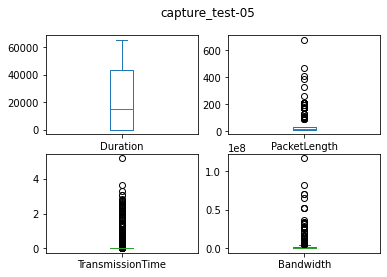

In [5]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-05")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[0][c].plot.box(ax=i)

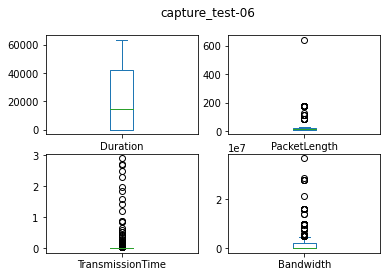

In [6]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-06")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[1][c].plot.box(ax=i)

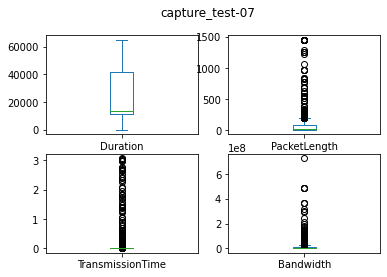

In [7]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-07")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[2][c].plot.box(ax=i)

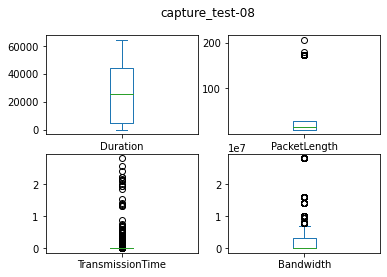

In [8]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-08")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[3][c].plot.box(ax=i)

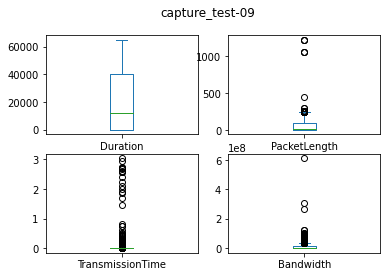

In [9]:
fig, axs = plt.subplots(2, 2)
plot_cols = ["Duration", "PacketLength", "TransmissionTime", "Bandwidth"]

fig.suptitle("capture_test-09")
for i, c in zip(axs.flat, plot_cols):
    captures_pd[4][c].plot.box(ax=i)

## Data Cleaning

### ```capture_test-05```

In [10]:
captures_pd[0].loc[:, "SourceAddress"].unique()

array(['28:39:26:3b:f0:d7', '00:c0:ca:a9:cd:ce', 'ce:e1:bf:00:9a:ca',
       None, '44:48:c1:74:f0:01', '44:48:c1:74:ef:01',
       '44:48:c1:74:ef:00', 'a8:9c:ed:68:ae:71', '00:c0:ca:a9:e7:52',
       '02:c0:ca:a9:cd:ce', '48:5f:99:a8:3b:1f', '5e:4b:d4:81:9d:b6',
       '6c:c4:9f:4b:46:61', '7c:c2:25:9c:f3:e4', '86:6b:8a:20:05:76',
       'ba:5f:26:3f:9e:1a', '44:48:c1:74:f0:61', '64:79:f0:2b:a2:00'],
      dtype=object)

### ```capture_test-06```

In [11]:
captures_pd[1].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_6 = captures_pd[1].loc[captures_pd[1]["SourceAddress"] == target_source_address, :]

In [64]:
flows_6 = flow_creation(captures_pd[1])
flows_6_labeled = binary_labeler(flows=flows_6, criterion=target_source_address, label_name="IsMicrophone", label_values=(0,0))
flows_6_labeled.drop(labels=[None], axis=0, inplace=True)
flows_6_labeled.to_csv("datasets/capture_test-06_flows_labeled.csv")

In [65]:
flows_6_labeled

,Duration_mean,Duration_sd,Bandwidth_sd,CDF_pl,IsMicrophone
00:c0:ca:a9:cd:ce,23604.662921,15274.375750,6.512009e+06,3068.0,0
ce:e1:bf:00:9a:ca,21872.487179,7299.870878,8.483043e+06,232.0,0
7c:c2:25:9c:f3:e4,31621.969697,29933.691172,3.421847e+06,152.0,0
28:39:26:3b:f0:d7,37704.520000,16944.703949,3.466978e+06,96.0,0
02:c0:ca:a9:cd:ce,46166.333333,122.742605,4.573996e+06,128.0,0
00:c0:ca:a9:e7:52,2901.333333,9452.240120,1.395520e+06,112.0,0
44:48:c1:74:ef:00,40448.000000,0.000000,3.078749e+06,16.0,0


In [12]:
filtered_capture_6

,SourceAddress,DestinationAddress,Duration,PacketLength,Timestamp,TimestampOffset,TransmissionTime,Bandwidth
4,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.874525,0.855028,2.806926e+01
5,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.875136,0.000611,3.927987e+04
6,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.876036,0.000900,2.666667e+04
7,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.886045,0.010009,2.397842e+03
8,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.887352,0.001307,1.836266e+04
9,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.890585,0.003233,7.423446e+03
10,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,1.979511,0.088926,2.698873e+02
11,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,2.104550,0.125039,1.919401e+02
12,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,26114,24,1.705422e+09,2.105587,0.001037,2.314368e+04
129,ce:e1:bf:00:9a:ca,00:c0:ca:a9:cd:ce,11264,24,1.705422e+09,17.168276,0.046302,5.183361e+02


### ```capture_test-07```

#### Cleaning

In [13]:
captures_pd[2].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_7 = captures_pd[2].loc[captures_pd[2]["SourceAddress"] == target_source_address, :]

#### Saving cleaned sample

In [14]:
filtered_capture_7.to_csv("datasets/capture_test-07_filtered.csv")

#### Causality?

Text(0.5, 1.0, 'PacketLength through time')

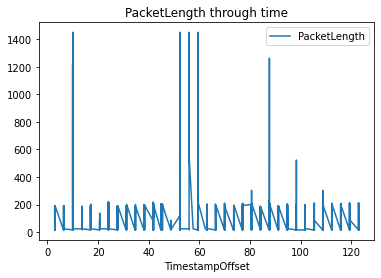

In [15]:
filtered_capture_7.plot.line(x="TimestampOffset", y="PacketLength", label="PacketLength")
plt.title("PacketLength through time")

Text(0.5, 1.0, 'Ringtone track')

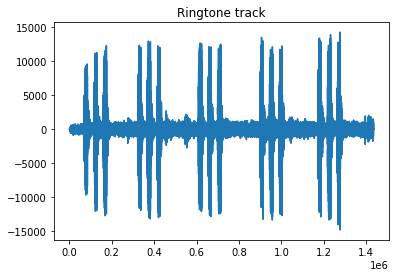

In [16]:
plt.plot(list(range(len(ringtone_capture[1]))), ringtone_capture[1], label="Pressure")
plt.title("Ringtone track")

In [17]:
len(ringtone_capture[1]), filtered_capture_7.shape[0]

(1434624, 2444)

In [18]:
offset = 0
kernel_size = int(len(ringtone_capture[1]) / (filtered_capture_7.shape[0] - offset))
convolved, sampled = [], []
iters = filtered_capture_7.shape[0] - offset
sampled += [0] * offset
for i in range(iters):
    sampled.append(ringtone_capture[1][i*kernel_size])

Text(0.5, 1.0, 'Sampled ringtone track')

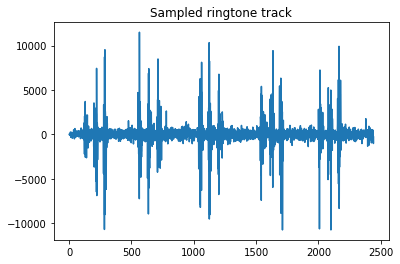

In [19]:
plt.plot(list(range(len(sampled))), sampled, label="Pressure")
plt.title("Sampled ringtone track")

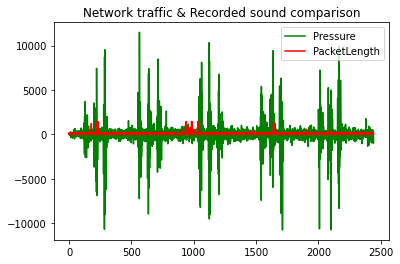

In [20]:
plt.plot(list(range(len(sampled))), sampled, color='g', label="Pressure")
plt.plot(list(range(len(sampled))), filtered_capture_7["PacketLength"], color='r', label="PacketLength")
plt.title("Network traffic & Recorded sound comparison")
plt.legend()

In [21]:
from granger_causality import is_granger_caused, grangers_causation_matrix
concat_pd = pd.concat([filtered_capture_7.reset_index()["PacketLength"], pd.Series(sampled)], axis=1)
concat_pd.columns = ["PacketLength", "Sound"]
grange_caus_mat = grangers_causation_matrix(data=concat_pd, variables=concat_pd.columns, verbose=False, maxlag=20)
print(is_granger_caused(granger_causality_table=grange_caus_mat, y="PacketLength", x="Sound", threshold=.05))

C:\Users\nsimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\nsimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\nsimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\nsimo\AppData\Local\Packages\P

True


In [22]:
grange_caus_mat

,PacketLength_x,Sound_x
PacketLength_y,1.0000,0.0189
Sound_y,0.0919,1.0000


#### Labeling and Saving

In [55]:
import importlib
import preprocessing #import the module here, so that it can be reloaded.
importlib.reload(preprocessing)

<module 'preprocessing' from 'c:\\Users\\nsimo\\Documents\\VS Code repo\\atcns-demo\\preprocessing.py'>

In [56]:
flows_7 = flow_creation(captures_pd[2])
flows_7_labeled = binary_labeler(flows=flows_7, criterion=target_source_address, label_name="IsMicrophone")
flows_7_labeled.drop(labels=[None], axis=0, inplace=True)
flows_7_labeled.to_csv("datasets/capture_test-07_flows_labeled.csv")

In [57]:
flows_7_labeled


,Duration_mean,Duration_sd,Bandwidth_sd,CDF_pl,IsMicrophone
00:c0:ca:a9:cd:ce,20644.399281,18301.848699,3.255637e+07,40727.0,0
ce:e1:bf:00:9a:ca,25936.177578,15453.030386,2.985542e+07,60775.0,1
00:c0:ca:a9:e7:52,10476.209945,18732.294909,3.347262e+06,2316.0,0
28:39:26:3b:f0:d7,35028.770492,19675.315796,3.368249e+06,772.0,0
7c:c2:25:9c:f3:e4,16684.481203,24054.148377,3.855476e+06,696.0,0
02:c0:ca:a9:cd:ce,45374.217391,685.189541,5.592894e+06,192.0,0
48:5f:99:a8:3b:1f,41562.130435,9302.188504,9.715918e+05,192.0,0


### ```capture_test-08```

#### Filtering and cleaning

In [60]:
captures_pd[3].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_8 = captures_pd[3].loc[captures_pd[3]["SourceAddress"] == target_source_address, :]
filtered_capture_8.to_csv("datasets/capture_test-08_filtered.csv")

flows_8 = flow_creation(captures_pd[3])
flows_8_labeled = binary_labeler(flows=flows_8, criterion=target_source_address, label_name="IsMicrophone", label_values=(0,0))
flows_8_labeled.drop(labels=[None], axis=0, inplace=True)
filtered_capture_8.to_csv("datasets/capture_test-08_flows_labeled.csv")


flows_8_labeled

,Duration_mean,Duration_sd,Bandwidth_sd,CDF_pl,IsMicrophone
00:c0:ca:a9:cd:ce,27050.457746,14990.840742,4.112146e+06,7772.0,0
6c:c4:9f:4b:50:61,24128.955224,23347.660316,1.277767e+07,356.0,0
c8:89:f3:b3:ea:f6,27325.410959,23592.025440,1.194531e+07,420.0,0
28:39:26:3b:f0:d7,38839.714286,19147.844186,3.216595e+06,64.0,0
48:5f:99:a8:3b:1f,44033.000000,6237.160380,1.135050e+03,32.0,0
44:48:c1:74:ef:00,42775.272727,3429.739964,2.388539e+06,48.0,0
ce:e1:bf:00:9a:ca,26114.000000,0.000000,1.366183e+04,24.0,0
44:48:c1:74:ef:01,28227.473282,20562.248451,6.980549e+06,1284.0,0
00:c0:ca:a9:e7:52,267.130435,1281.112560,1.621735e+06,168.0,0
7c:c2:25:9c:f3:e4,22118.600000,28030.153367,1.647986e+06,28.0,0


### ```capture_test-09```

#### Filtering and Cleaning

In [61]:
captures_pd[4].loc[:, "SourceAddress"].unique()
target_source_address = "ce:e1:bf:00:9a:ca"
filtered_capture_9 = captures_pd[4].loc[captures_pd[4]["SourceAddress"] == target_source_address, :]
filtered_capture_9.to_csv("datasets/capture_test-09_filtered.csv")

flows_9 = flow_creation(captures_pd[4])
flows_9_labeled = binary_labeler(flows=flows_9, criterion=target_source_address, label_name="IsMicrophone", label_values=(0,0))
flows_9_labeled.drop(labels=[None], axis=0, inplace=True)
filtered_capture_9.to_csv("datasets/capture_test-09_flows_labeled.csv")


flows_9_labeled

,Duration_mean,Duration_sd,Bandwidth_sd,CDF_pl,IsMicrophone
00:c0:ca:a9:cd:ce,21452.612159,20389.877776,1.891209e+07,20575.0,0
ce:e1:bf:00:9a:ca,25725.497997,15738.477287,2.841508e+07,32553.0,0
00:c0:ca:a9:e7:52,1122.084291,5796.309453,1.799499e+06,1820.0,0
48:5f:99:a8:3b:1f,41709.307692,2582.221504,1.465226e+03,48.0,0
7c:c2:25:9c:f3:e4,26729.735294,27818.285885,5.311671e+06,368.0,0
44:48:c1:74:ef:00,32444.736842,17889.947903,1.815494e+06,92.0,0
28:39:26:3b:f0:d7,43623.400000,2386.893993,2.889226e+06,32.0,0
02:c0:ca:a9:cd:ce,53761.000000,0.000000,5.218413e+06,32.0,0


### Concatenation of all the datasets

In [69]:
flows = [flows_6_labeled, flows_7_labeled, flows_8_labeled, flows_9_labeled]

for f in flows:
    f.loc[:, "SourceAddress"] = f.index

full_dataset = pd.concat(flows, axis=0)
full_dataset.to_csv("datasets/full_dataset_test0.csv")